In [1]:
#Import necessary libraries/packages

import numpy as np
import pandas as pd
from scipy.io import arff
#import glob

import matplotlib.pyplot as plt
%matplotlib inline


#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize

#from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_auc
from sklearn.metrics import auc

### Suppresses Warning
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Metrics for Isolation Forest with just one file

    # load the train data through arff  under scipy
data_train, meta_train = arff.loadarff('HeartbeatDimension1_TRAIN.arff')
    # Put the array in dataframe format with help of panda
df_train=pd.DataFrame(data_train)
print(df_train)


    # Extract attributes/features and output
X_train = df_train.iloc[:,: -1].values
    # Extract  output and encode it- 1 for normal and 0 for abnormal
y_train = LabelEncoder().fit_transform(df_train.iloc[:,-1])
print(y_train)
y_train = np.where(y_train==0,-1, y_train)
print(y_train)
    # Rows other than outlier rows
normal=y_train ==1
print(normal)
    # load the test dataset

    # Normal Train data after removing outliers
X_train, y_train=X_train[normal, :], y_train[normal]



data_test, meta_test = arff.loadarff('HeartbeatDimension1_TEST.arff')

df_test=pd.DataFrame(data_test)


X_test = df_test.iloc[:,: -1].values
y_test = LabelEncoder().fit_transform(df_test.iloc[:,-1])

y_test = np.where(y_test==0,-1, y_test)

    # Isolation Forest
     
    # fit the model
isf=IsolationForest(contamination=0.1)
isf.fit(X_train)
    #predict values
y_pred_test_isf=isf.fit_predict(X_test)

y_status_test_isf=isf.predict(X_test)

print(isf.decision_function(X_test))

    
    # calculate metrics and store
print(accuracy_score(y_test, y_pred_test_isf))
print(precision_score(y_test, y_pred_test_isf))
print(recall_score(y_test, y_pred_test_isf))
print(roc_auc_score(y_test, y_pred_test_isf)) 
print(confusion_matrix (y_test, y_pred_test_isf)) 


     channel_0_0  channel_0_1  channel_0_2  channel_0_3  channel_0_4  \
0       0.000949     0.001488     0.000314     0.000995     0.002099   
1       0.020264     0.017023     0.006052     0.003950     0.023982   
2       0.021082     0.020687     0.009948     0.002039     0.000885   
3       0.001634     0.002511     0.003524     0.006575     0.005593   
4       0.020809     0.007473     0.012304     0.011340     0.012156   
..           ...          ...          ...          ...          ...   
199     0.002383     0.003405     0.004029     0.004600     0.003906   
200     0.002211     0.001956     0.002747     0.000866     0.004023   
201     0.009989     0.002671     0.001707     0.001381     0.009284   
202     0.000815     0.001325     0.001280     0.001586     0.001721   
203     0.002995     0.003105     0.003040     0.000680     0.004439   

     channel_0_5  channel_0_6  channel_0_7  channel_0_8  channel_0_9  ...  \
0       0.001732     0.002043     0.000955     0.000379   

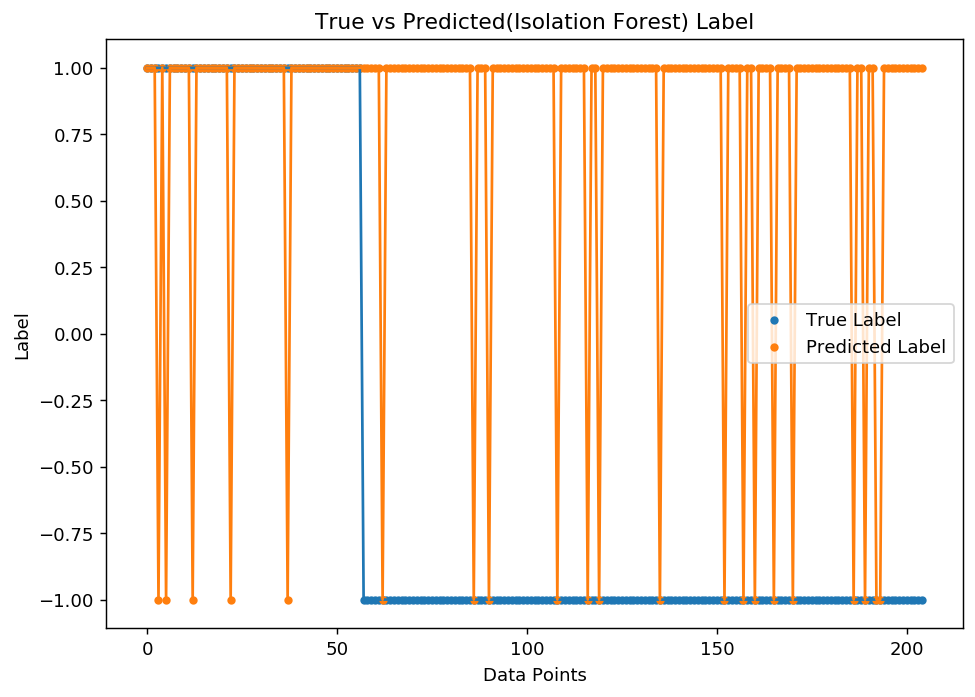

In [3]:
# Comparative  performance on True and Predicted labels- Plottting
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)



ax.plot(y_test)
ax.scatter(range(len(y_test)), y_test, s=13, label = 'True Label')
           
ax.plot(y_pred_test_isf)
ax.scatter(range(len(y_pred_test_isf)), y_pred_test_isf, s=13, label = 'Predicted Label')

ax.set_title('True vs Predicted(Isolation Forest) Label')
ax.set_xlabel('Data Points')
ax.set_ylabel('Label')

ax.legend()

plt.show()

In [4]:
# Metrics for Local Outlier Factor with just one file

    # load the train data through arff  under scipy
data_train, meta_train = arff.loadarff('HeartbeatDimension1_TRAIN.arff')
    # Put the array in dataframe format with help of panda
df_train=pd.DataFrame(data_train)
#print(df_train)

    # Extract attributes/features and output
X_train = df_train.iloc[:,: -1].values
    # Extract  output and encode it- 1 for normal and 0 for abnormal
y_train = LabelEncoder().fit_transform(df_train.iloc[:,-1])
#print(y_train)
y_train = np.where(y_train==0,-1, y_train)
print(y_train)
    # Rows other than outlier rows
normal=y_train ==1
print(normal)
    # load the test dataset

    # Normal Train data after removing outliers
X_train, y_train=X_train[normal, :], y_train[normal]
#print(X_train.shape)
print(y_train)


data_test, meta_test = arff.loadarff('HeartbeatDimension1_TEST.arff')

df_test=pd.DataFrame(data_test)


X_test = df_test.iloc[:,: -1].values
y_test = LabelEncoder().fit_transform(df_test.iloc[:,-1])
#print(y_test)
y_test = np.where(y_test==0,-1, y_test)
print(y_test)
    # Local Outlier Factor
     
    # fit the model
lof=LocalOutlierFactor(novelty=False)
isf.fit(X_train)
    #predict values
y_pred_test_lof=lof.fit_predict(X_test)
print(y_test, y_pred_test_lof)



    
    # calculate metrics and store
print(accuracy_score(y_test, y_pred_test_lof))
print(precision_score(y_test, y_pred_test_lof))
print(recall_score(y_test, y_pred_test_lof))
print(roc_auc_score(y_test, y_pred_test_lof)) 
print(confusion_matrix (y_test, y_pred_test_lof))    


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True 

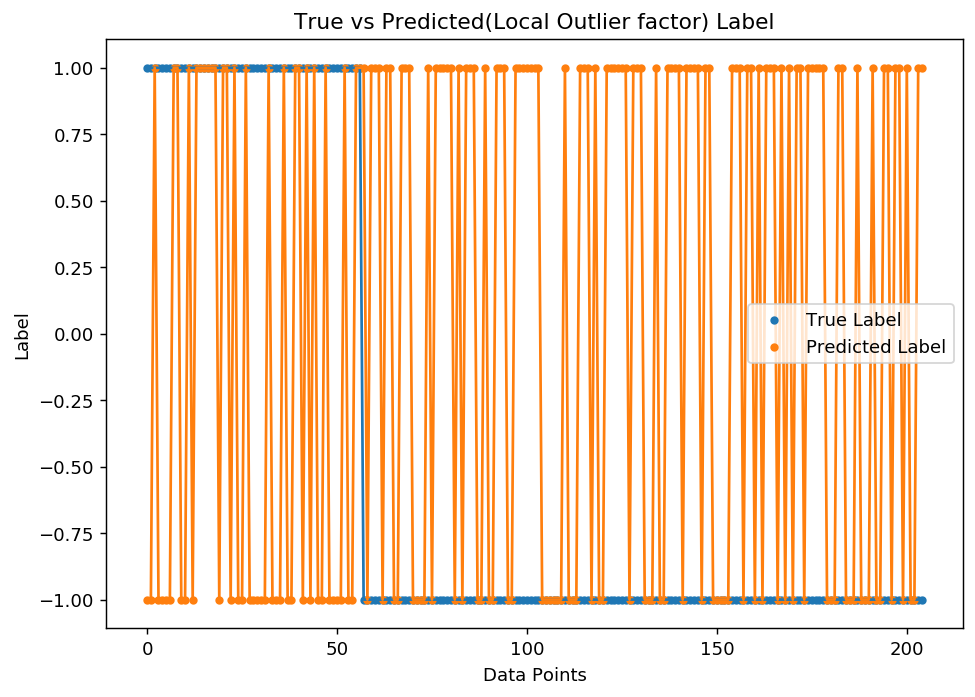

In [5]:
# Comparative  performance on True and Predicted labels- Plottting
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)



ax.plot(y_test)
ax.scatter(range(len(y_test)), y_test, s=13, label = 'True Label')
           
ax.plot(y_pred_test_lof)
ax.scatter(range(len(y_pred_test_lof)), y_pred_test_lof, s=13, label = 'Predicted Label')

ax.set_title('True vs Predicted(Local Outlier factor) Label')
ax.set_xlabel('Data Points')
ax.set_ylabel('Label')

ax.legend()

plt.show()

In [6]:
#Metrics for OneClassSVM with just one file

    # load the train data through arff  under scipy
data_train, meta_train = arff.loadarff('HeartbeatDimension1_TRAIN.arff')
    # Put the array in dataframe format with help of panda
df_train=pd.DataFrame(data_train)
#print(df_train)

    # Extract attributes/features and output
X_train = df_train.iloc[:,: -1].values
    # Extract  output and encode it- 1 for normal and 0 for abnormal
y_train = LabelEncoder().fit_transform(df_train.iloc[:,-1])
#print(y_train)
y_train = np.where(y_train==0,-1, y_train)
print(y_train)
    # Rows other than outlier rows
normal=y_train ==1
print(normal)
    # load the test dataset

    # Normal Train data after removing outliers
X_train, y_train=X_train[normal, :], y_train[normal]
#print(X_train.shape)
print(y_train)


data_test, meta_test = arff.loadarff('HeartbeatDimension1_TEST.arff')

df_test=pd.DataFrame(data_test)


X_test = df_test.iloc[:,: -1].values
y_test = LabelEncoder().fit_transform(df_test.iloc[:,-1])
#print(y_test)
y_test = np.where(y_test==0,-1, y_test)
print(y_test)

#OneClassSVM Model 
    # fit the model
svm=OneClassSVM(kernel='rbf')
svm.fit(X_train)
    #predict values
y_pred_test_svm=svm.fit_predict(X_test)
  



    
    # calculate metrics and store
print(accuracy_score(y_test, y_pred_test_svm))
print(precision_score(y_test, y_pred_test_svm))
print(recall_score(y_test, y_pred_test_svm))
print(roc_auc_score(y_test, y_pred_test_svm)) 
print(confusion_matrix (y_test, y_pred_test_svm))   

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True 

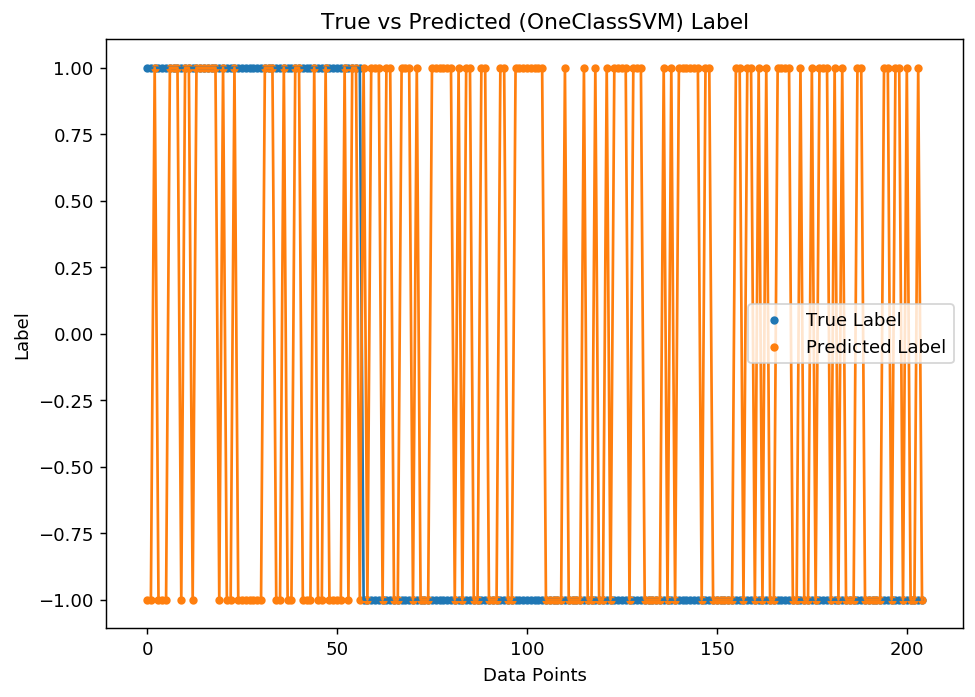

In [7]:
# Comparative  performance on True and Predicted labels- Plottting
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)



ax.plot(y_test)
ax.scatter(range(len(y_test)), y_test, s=13, label = 'True Label')
           
ax.plot(y_pred_test_svm)
ax.scatter(range(len(y_pred_test_svm)), y_pred_test_svm, s=13, label = 'Predicted Label')

ax.set_title('True vs Predicted (OneClassSVM) Label')
ax.set_xlabel('Data Points')
ax.set_ylabel('Label')

ax.legend()

plt.show()

In [ ]:
'''
#Calculating the Metrics for three Outlier Models, namely ISOLATION FOREST,LOCAL OUTLIER FACTOR and OneClassSVM and 
with all the 61 data files- one by one via loop
'''
#Initialise the lists for storing various metrics for  Isolation Forest over all the data files
acc_isf=[]
precision_isf=[]
recall_isf=[]
roc_isf=[]

#Initialise the lists for storing various metrics for Local Outlier Factor over all the data files

acc_lof=[]
precision_lof=[]
recall_lof=[]
roc_lof=[]
#Initialise the lists for storing various metrics for OneClassSVM over all the data files
acc_svm=[]
precision_svm=[]
recall_svm=[]
roc_svm=[]


# loop over all data files in format .arff and calculating metrics for the three models( 61 in number)
for i in range(1, 61):
    # load the training through arff  under scipy
    data_train, meta_train = arff.loadarff('HeartbeatDimension'+str(i)+'_TRAIN.arff')

    # Put the array in dataframe format with help of panda
    df_train=pd.DataFrame(data_train)


    # Extract attributes/features X and output/labels y from training data
    X_train = df_train.iloc[:,: -1].values
    # Extract  output/labels and encode it- 1 for normal and -1 for abnormal
    y_train = LabelEncoder().fit_transform(df_train.iloc[:,-1])
    # changing the code 0 wherever it occurs to -1 
    y_train = np.where(y_train==0,-1, y_train)

    # Rows in the data with label normal 
    normal=y_train ==1

   
    # Training data after removing outliers/abnormal ( i.e. normal training data)
    X_train, y_train=X_train[normal, :], y_train[normal]

    # Now load the test dataset- it is noted that downloaded data is already split between training and test data


    data_test, meta_test = arff.loadarff('HeartbeatDimension'+str(i)+'_TEST.arff')

    df_test=pd.DataFrame(data_test)

    # Extract attributes/features X and output/labels y from test data
    X_test = df_test.iloc[:,: -1].values
    y_test = LabelEncoder().fit_transform(df_test.iloc[:,-1])
    # changing the code 0 wherever it occurs to -1 
    y_test = np.where(y_test==0,-1, y_test)

    '''
    Isolation Forest
    ''' 
    # Set up the model
    isf=IsolationForest(contamination=0.1)
    #fit the model
    isf.fit(X_train)
    #predict labels for the test data
    y_pred_test_isf=isf.fit_predict(X_test)

   

    
    # calculate metrics and store them
    acc_isf.append(accuracy_score(y_test,y_pred_test_isf))
    precision_isf.append(precision_score(y_test,y_pred_test_isf))
    recall_isf.append(recall_score(y_test,y_pred_test_isf))
    roc_isf.append(roc_auc_score(y_test,y_pred_test_isf)) 
    

    '''
    Local Outlier Factor
    ''' 
    # Set up the model
    lof=LocalOutlierFactor(novelty=False)
    # Fit the model
    isf.fit(X_train)
    #Predict labels for the test data
    y_pred_test_lof=lof.fit_predict(X_test)
    #print(y_test, y_pred_test)

   

    # calculate and store metrics
    acc_lof.append(accuracy_score(y_test,y_pred_test_lof))
    precision_lof.append(precision_score(y_test,y_pred_test_lof))
    recall_lof.append(recall_score(y_test,y_pred_test_lof))
    roc_lof.append(roc_auc_score(y_test,y_pred_test_lof)) 
 
    '''
    One Class SVM
    ''' 
    # Set up the model
    svm=OneClassSVM(kernel='rbf')
    # Fit the model
    svm.fit(X_train)
    #Predict labels for the test data
    y_pred_test_svm=svm.fit_predict(X_test)


   

    # calculate and Store metrics 
    acc_svm.append(accuracy_score(y_test,y_pred_test_svm))
    precision_svm.append(precision_score(y_test,y_pred_test_svm))
    recall_svm.append(recall_score(y_test,y_pred_test_svm))
    roc_svm.append(roc_auc_score(y_test,y_pred_test_svm)) 
               

# print average of metrics



print("printing average of various  metrics for Isolation Forest")
print(np.average(acc_isf))
print(np.average(precision_isf))
print(np.average(recall_isf))
print(np.average(roc_isf))


print("printing average of various metrics for Local Outlier Factor")
print(np.average(acc_lof))
print(np.average(precision_lof))
print(np.average(recall_lof))
print(np.average(roc_lof))

print("printing average of various metrics for OneClassSVM")

print(np.average(acc_svm))
print(np.average(precision_svm))
print(np.average(recall_svm))
print(np.average(roc_svm))

In [ ]:
# Comparative  performance on Accuracy- Plottting
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)



ax.plot(acc_isf)
ax.scatter(range(len(acc_isf)), acc_isf, s=13, label = 'Accuracy score with  with ISF')
           
ax.plot(acc_lof)
ax.scatter(range(len(acc_lof)), acc_lof, s=13, label = 'Accuracy score with  with LOF')

ax.plot(acc_svm)
ax.scatter(range(len(acc_svm)), acc_svm, s=13, label = 'Accuracy score with OneClassSVM')           
ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Accuracy')
ax.set_xlabel('Dimensions/Data Files')
ax.set_ylabel('Accuracy Score')

ax.legend()

plt.show()

In [ ]:
# Comparative  performance on Precision- Plotting
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)


ax.plot(precision_isf)
ax.scatter(range(len(precision_isf)), precision_isf, s=13, label = 'Precision score  with ISF')
           
ax.plot(precision_lof)
ax.scatter(range(len(precision_lof)), precision_lof, s=13, label = 'Precision score  with LOF')
ax.plot(precision_svm)
ax.scatter(range(len(precision_svm)), precision_svm, s=13, label = 'Precision score with OneClassSVM')
           
ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Precision')
ax.set_xlabel('Dimensions/Data Files')
ax.set_ylabel('Precision Score')

ax.legend()

plt.show()

In [ ]:
# Comparative  performance on Recall- Plotting
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)


ax.plot(recall_isf)
ax.scatter(range(len(recall_isf)), recall_isf, s=13, label = 'Recall score  with ISF')
           
ax.plot(recall_lof)
ax.scatter(range(len(recall_lof)), recall_lof, s=13, label = 'Recall score  with LOF')

ax.plot(recall_svm)
ax.scatter(range(len(recall_svm)), recall_svm, s=13, label = 'Recall score with OneClassSVM')
           
ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Recall')
ax.set_xlabel('Dimensions/Data Files')
ax.set_ylabel('Recall Score')

ax.legend()

plt.show()

In [ ]:
# Comparative  performance of ROC AUC- Plotting
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)


ax.plot(roc_isf)
ax.scatter(range(len(roc_isf)), roc_isf, s=13, label = 'ROC AUC  score with ISF')
           
ax.plot(roc_lof)
ax.scatter(range(len(roc_lof)), roc_lof, s=13, label = 'ROC AUC  score  with LOF')

ax.plot(roc_svm)
ax.scatter(range(len(roc_svm)), roc_svm, s=13, label = 'ROC AUC score with OneClassSVM')
           
ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('ROC AUC ')
ax.set_xlabel('Dimensions/Data Files')
ax.set_ylabel('ROC AUC  Score')

ax.legend()

plt.show()